# Imports and Initialization

In [1]:
import boto3
import io #read files
from PIL import Image,  ImageFont, ImageDraw 
from pprint import pprint
import datetime

#initializing client connection with the resources. s3 ~ bucket
s3 = boto3.resource('s3')
rekognition = boto3.client('rekognition', region_name='us-east-2')
dynamodb = boto3.client('dynamodb', region_name='us-east-2')

bucket = 'face-recognition-sirajahmed-20020828'
tableName = 'face-recognition-sirajahmed-20020828'
collectionName = 'face-recognition-sirajahmed-20020828'


# Data Labeling

In [2]:
# Explain Images
# Get list of objects for indexing
imagesTrain=[

('subject01_1_11zon.jpg','Alex'),
('subject01_2_11zon.jpg','Alex'),
('subject01_3_11zon.jpg','Alex'),
('subject01_4_11zon.jpg','Alex'),
('subject01_5_11zon.jpg','Alex'),
('subject01_6_11zon.jpg','Alex'),
('subject01_7_11zon.jpg','Alex'),
('subject01_8_11zon.jpg','Alex'),
('subject01_9_11zon.jpg','Alex'),
('subject01_10_11zon.jpg','Alex'),
('subject01_11_11zon.jpg','Alex'),
('subject02_12_11zon.jpg','Bob'),
('subject02_13_11zon.jpg','Bob'),
('subject02_14_11zon.jpg','Bob'),
('subject02_15_11zon.jpg','Bob'),
('subject02_16_11zon.jpg','Bob'),
('subject02_17_11zon.jpg','Bob'),
('subject02_18_11zon.jpg','Bob'),
('subject02_19_11zon.jpg','Bob'),
('subject02_20_11zon.jpg','Bob'),
('subject02_21_11zon.jpg','Bob'),
('subject02_22_11zon.jpg','Bob'),
('subject03_23_11zon.jpg','Charlie'),
('subject03_24_11zon.jpg','Charlie'),
('subject03_25_11zon.jpg','Charlie'),
('subject03_26_11zon.jpg','Charlie'),
('subject03_27_11zon.jpg','Charlie'),
('subject03_28_11zon.jpg','Charlie'),
('subject03_29_11zon.jpg','Charlie'),
('subject03_30_11zon.jpg','Charlie'),
('subject03_31_11zon.jpg','Charlie'),
('subject03_32_11zon.jpg','Charlie'),
('subject03_33_11zon.jpg','Charlie'),
('subject04_34_11zon.jpg','Denis'),
('subject04_35_11zon.jpg','Denis'),
('subject04_36_11zon.jpg','Denis'),
('subject04_37_11zon.jpg','Denis'),
('subject04_38_11zon.jpg','Denis'),
('subject04_39_11zon.jpg','Denis'),
('subject04_40_11zon.jpg','Denis'),
('subject04_41_11zon.jpg','Denis'),
('subject04_42_11zon.jpg','Denis'),
('subject04_43_11zon.jpg','Denis'),
('subject04_44_11zon.jpg','Denis'),
('subject05_45_11zon.jpg','Ellie'),
('subject05_46_11zon.jpg','Ellie'),
('subject05_47_11zon.jpg','Ellie'),
('subject05_48_11zon.jpg','Ellie'),
('subject05_49_11zon.jpg','Ellie'),
('subject05_50_11zon.jpg','Ellie'),
('subject05_51_11zon.jpg','Ellie'),
('subject05_52_11zon.jpg','Ellie'),
('subject05_53_11zon.jpg','Ellie'),
('subject05_54_11zon.jpg','Ellie'),
('subject05_55_11zon.jpg','Ellie'),
('subject06_56_11zon.jpg','Ferry'),
('subject06_57_11zon.jpg','Ferry'),
('subject06_58_11zon.jpg','Ferry'),
('subject06_59_11zon.jpg','Ferry'),
('subject06_60_11zon.jpg','Ferry'),
('subject06_61_11zon.jpg','Ferry'),
('subject06_62_11zon.jpg','Ferry'),
('subject06_63_11zon.jpg','Ferry'),
('subject06_64_11zon.jpg','Ferry'),
('subject06_65_11zon.jpg','Ferry'),
('subject06_66_11zon.jpg','Ferry'),
('subject07_67_11zon.jpg','Garry'),
('subject07_68_11zon.jpg','Garry'),
('subject07_69_11zon.jpg','Garry'),
('subject07_70_11zon.jpg','Garry'),
('subject07_71_11zon.jpg','Garry'),
('subject07_72_11zon.jpg','Garry'),
('subject07_73_11zon.jpg','Garry'),
('subject07_74_11zon.jpg','Garry'),
('subject07_75_11zon.jpg','Garry'),
('subject07_76_11zon.jpg','Garry'),
('subject07_77_11zon.jpg','Garry'),
('subject08_78_11zon.jpg','Harry'),
('subject08_79_11zon.jpg','Harry'),
('subject08_80_11zon.jpg','Harry'),
('subject08_81_11zon.jpg','Harry'),
('subject08_82_11zon.jpg','Harry'),
('subject08_83_11zon.jpg','Harry'),
('subject08_84_11zon.jpg','Harry'),
('subject08_85_11zon.jpg','Harry'),
('subject08_86_11zon.jpg','Harry'),
('subject08_87_11zon.jpg','Harry'),
('subject08_88_11zon.jpg','Harry'),
('subject09_89_11zon.jpg','Irina'),
('subject09_90_11zon.jpg','Irina'),
('subject09_91_11zon.jpg','Irina'),
('subject09_92_11zon.jpg','Irina'),
('subject09_93_11zon.jpg','Irina'),
('subject09_94_11zon.jpg','Irina'),
('subject09_95_11zon.jpg','Irina'),
('subject09_96_11zon.jpg','Irina'),
('subject09_97_11zon.jpg','Irina'),
('subject09_98_11zon.jpg','Irina'),
('subject09_99_11zon.jpg','Irina'),
('subject10_100_11zon.jpg','Jerry'),
('subject10_101_11zon.jpg','Jerry'),
('subject10_102_11zon.jpg','Jerry'),
('subject10_103_11zon.jpg','Jerry'),
('subject10_104_11zon.jpg','Jerry'),
('subject10_105_11zon.jpg','Jerry'),
('subject10_106_11zon.jpg','Jerry'),
('subject10_107_11zon.jpg','Jerry'),
('subject10_108_11zon.jpg','Jerry'),
('subject10_109_11zon.jpg','Jerry'),
('subject10_110_11zon.jpg','Jerry'),
('subject11_111_11zon.jpg','Kim'),
('subject11_112_11zon.jpg','Kim'),
('subject11_113_11zon.jpg','Kim'),
('subject11_114_11zon.jpg','Kim'),
('subject11_115_11zon.jpg','Kim'),
('subject11_116_11zon.jpg','Kim'),
('subject11_117_11zon.jpg','Kim'),
('subject11_118_11zon.jpg','Kim'),
('subject11_119_11zon.jpg','Kim'),
('subject11_120_11zon.jpg','Kim'),
('subject11_121_11zon.jpg','Kim'),
('subject12_122_11zon.jpg','leo'),
('subject12_123_11zon.jpg','leo'),
('subject12_124_11zon.jpg','leo'),
('subject12_125_11zon.jpg','leo'),
('subject12_126_11zon.jpg','leo'),
('subject12_127_11zon.jpg','leo'),
('subject12_128_11zon.jpg','leo'),
('subject12_129_11zon.jpg','leo'),
('subject12_130_11zon.jpg','leo'),
('subject12_131_11zon.jpg','leo'),
('subject12_132_11zon.jpg','leo'),
('subject13_133_11zon.jpg','Manny'),
('subject13_134_11zon.jpg','Manny'),
('subject13_135_11zon.jpg','Manny'),
('subject13_136_11zon.jpg','Manny'),
('subject13_137_11zon.jpg','Manny'),
('subject13_138_11zon.jpg','Manny'),
('subject13_139_11zon.jpg','Manny'),
('subject13_140_11zon.jpg','Manny'),
('subject13_141_11zon.jpg','Manny'),
('subject13_142_11zon.jpg','Manny'),
('subject13_143_11zon.jpg','Manny'),
('subject14_144_11zon.jpg','Ned'),
('subject14_145_11zon.jpg','Ned'),
('subject14_146_11zon.jpg','Ned'),
('subject14_147_11zon.jpg','Ned'),
('subject14_148_11zon.jpg','Ned'),
('subject14_149_11zon.jpg','Ned'),
('subject14_150_11zon.jpg','Ned'),
('subject14_151_11zon.jpg','Ned'),
('subject14_152_11zon.jpg','Ned'),
('subject14_153_11zon.jpg','Ned'),
('subject14_154_11zon.jpg','Ned'),
('subject15_155_11zon.jpg','oxam'),
('subject15_156_11zon.jpg','oxam'),
('subject15_157_11zon.jpg','oxam'),
('subject15_158_11zon.jpg','oxam'),
('subject15_159_11zon.jpg','oxam'),
('subject15_160_11zon.jpg','oxam'),
('subject15_161_11zon.jpg','oxam'),
('subject15_162_11zon.jpg','oxam'),
('subject15_163_11zon.jpg','oxam'),
('subject15_164_11zon.jpg','oxam'),
('subject15_165_11zon.jpg','oxam'),
      ]

# Data Visualization

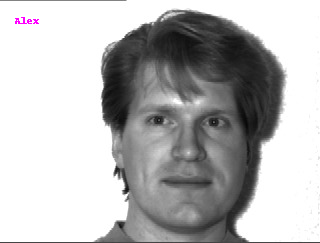

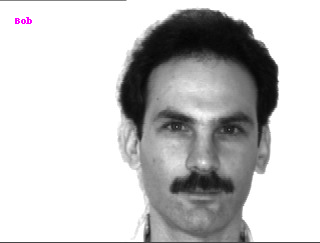

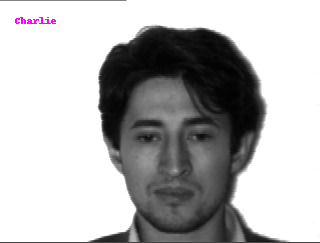

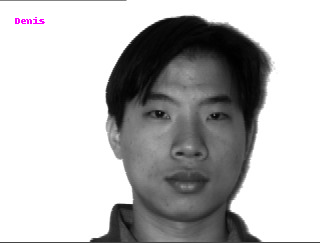

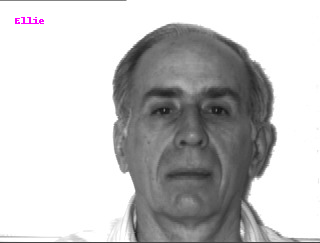

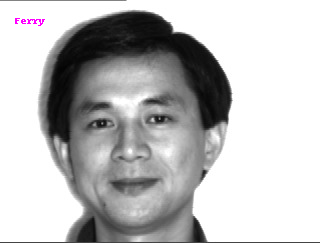

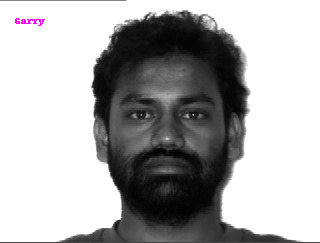

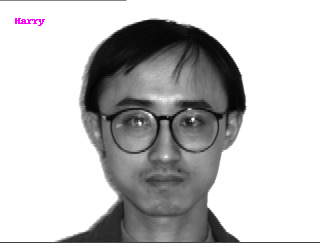

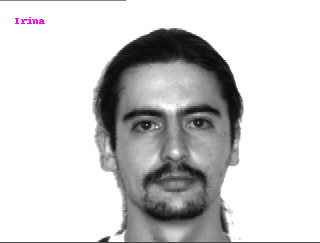

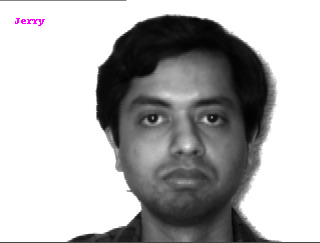

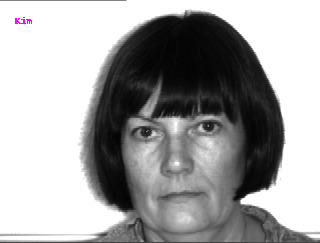

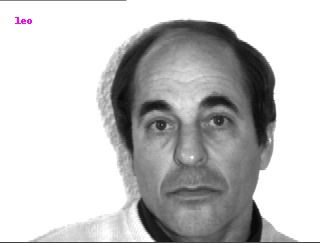

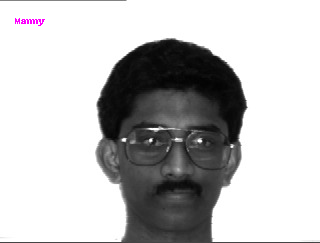

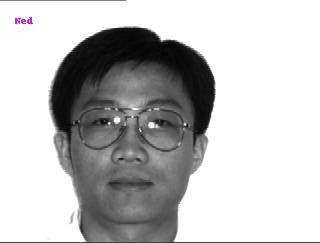

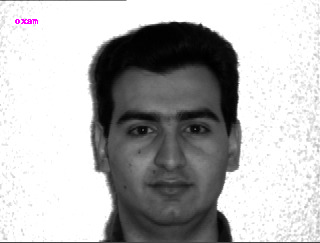

In [16]:
#read the images
for image in imagesTrain[0::11]:
    my_image = Image.open('Images/'+image[0])
    title_font = ImageFont.load_default()
    title_text = image[1]
    image_editable = ImageDraw.Draw(my_image)
    image_editable.text((15,15), title_text, (255, 0, 255), font=title_font)
    display(my_image)


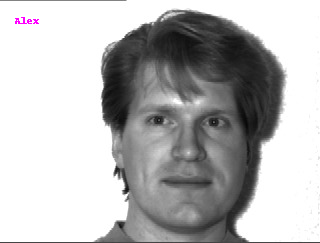

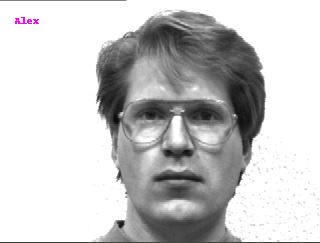

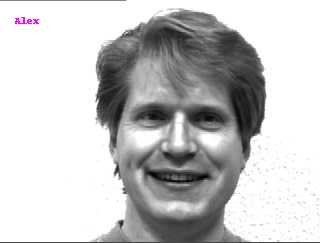

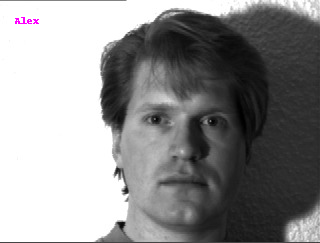

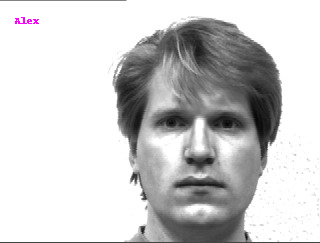

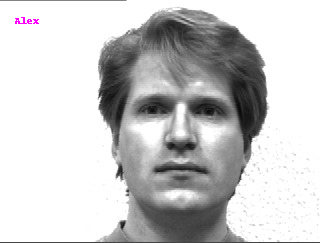

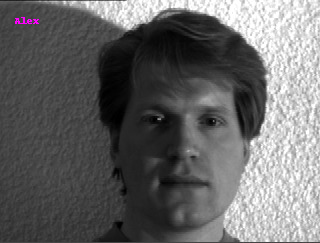

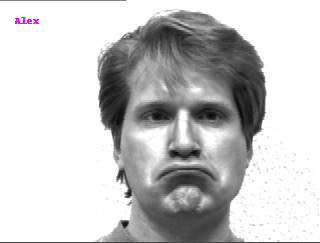

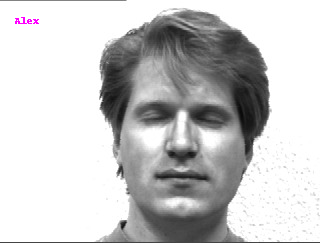

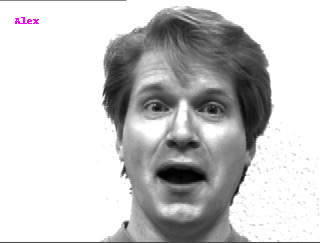

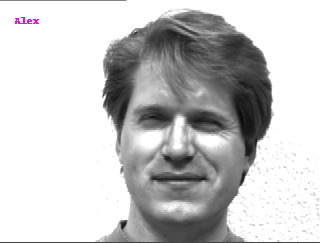

In [17]:
for image in imagesTrain[0:11]:
    my_image = Image.open('Images/'+image[0])
    title_font = ImageFont.load_default()
    title_text = image[1]
    image_editable = ImageDraw.Draw(my_image)
    image_editable.text((15,15), title_text, (255, 0, 255), font=title_font)
    display(my_image)

### Upload Images to S3 bucket using AWS CLI

## Core Functions 

In [18]:
def index_faces(bucket, key, collectionName):

    response = rekognition.index_faces(
        Image={"S3Object":
            {"Bucket": bucket,
            "Name": key}},
            CollectionId=collectionName)
    return response
    
def update_index(tableName,faceId, fullName):
    response = dynamodb.put_item(
        TableName=tableName,
        Item={
            'RekognitionId': {'S': faceId},
            'FullName': {'S': fullName}
            }
        )

## Train Images - Rekognition Image Indexing and DynamoDB record storage

In [20]:
firstImageTrain=True
# Iterate through list to Index Images   
for image in imagesTrain:
    key = image[0]
    print(key)

    try:

        # Calls Amazon Rekognition IndexFaces API to detect faces in S3 object 
        # to index faces into specified collection
        
        response = index_faces(bucket, key, collectionName)
        
        # Commit faceId and full name object metadata to DynamoDB
        
        if response['ResponseMetadata']['HTTPStatusCode'] == 200:
            faceId = response['FaceRecords'][0]['Face']['FaceId']

            personFullName = image[1]

            update_index(tableName,faceId,personFullName)

        # Print response to console
        if firstImageTrain:
            firstImageTrain=False
            print(response)

    except Exception as e:
        print(e)
        print("Error processing object {} from bucket {}. ".format(key, bucket))
        raise e

subject01_1_11zon.jpg
An error occurred (InvalidS3ObjectException) when calling the IndexFaces operation: Unable to get object metadata from S3. Check object key, region and/or access permissions.
Error processing object subject01_1_11zon.jpg from bucket face-recognition-sirajahmed-20020828. 


InvalidS3ObjectException: An error occurred (InvalidS3ObjectException) when calling the IndexFaces operation: Unable to get object metadata from S3. Check object key, region and/or access permissions.

# Perform Testing on Known Images

In [21]:
imagesTest=[('subject01_11_11zon.jpg','Alex'),
           ('subject02_22_11zon.jpg','Bob'),
            ('subject03_33_11zon.jpg','Charlie'),
            ('subject04_44_11zon.jpg','Denis'),
            ('subject05_55_11zon.jpg','Ellie'),
            ('subject06_66_11zon.jpg','Ferry'),
            ('subject07_77_11zon.jpg','Garry'),
            ('subject08_88_11zon.jpg','Harry'),
            ('subject09_99_11zon.jpg','Irina'),
            ('subject10_110_11zon.jpg','Jerry'),
            ('subject11_121_11zon.jpg','Kim'),
            ('subject12_132_11zon.jpg','leo'),
            ('subject13_143_11zon.jpg','Manny'),
            ('subject14_154_11zon.jpg','Ned'),
            ('subject15_165_11zon.jpg','oxam')
           ]


In [22]:
firstImageTest=True
for imageTest in imagesTest:
    print('####################################################')
    personNameConfidences = {}
    print('---------------------------------------------')
    print('Actual Image of the Person :: ' + imageTest[1] )
    print('---------------------------------------------')
    imageLoaded = Image.open('Images/'+imageTest[0])
    #display(imageLoaded)
    #stream = io.BytesIO()
    #imageLoaded.save(stream,format="JPEG")
    #image_binary = stream.getvalue()

    response = rekognition.search_faces_by_image(
            CollectionId=collectionName,
            Image={"S3Object":
            {"Bucket": bucket,
            "Name": imageTest[0]}},                                      
            )
    
    for match in response['FaceMatches']:
        facePrintID = match['Face']['FaceId']
        confidence = round(match['Face']['Confidence'], 5)
        
        face = dynamodb.get_item(
            TableName=tableName,  
            Key={'RekognitionId': {'S': match['Face']['FaceId']}}
            )
        
        if 'Item' in face:
            personName = face['Item']['FullName']['S']
            if personName in personNameConfidences.keys():
                personNameConfidences[personName].append(confidence)
            else:
                personNameConfidences[personName] = [confidence]
            if firstImageTest:
                
                print ('FacePrintID: ',facePrintID,'  ::  ' ,'Confidence: ' ,confidence,'  ::  ','Identified Person: ',personName )    
                print('---')
        else:
            print ('no match found in person lookup')
    print('---------------------')        
    print(personNameConfidences)
    print('---------------------') 
    firstImageTest=False
    
    ########   Fuzzy Logic   #########
    
    identifiedPersonConfidence = {}
    for personName in personNameConfidences.keys():
        averageConfidence = round(sum(personNameConfidences[personName]) / len(personNameConfidences[personName]), 5) 
        identifiedPersonConfidence[personName]=averageConfidence
        print( 'Identified Person : ',personName, '  ::  ', 'Confidence : ', averageConfidence)
        print('---------------------')

    predictedPerson = ''
    maxConfidence = 0
    for identifiedPerson in identifiedPersonConfidence.keys():
        if identifiedPersonConfidence[identifiedPerson] > maxConfidence:
            maxConfidence = identifiedPersonConfidence[identifiedPerson]
            predictedPerson = identifiedPerson
    # Display Image        
    title_font = ImageFont.truetype('PlayfairDisplay-Regular.ttf', 30)
    confidence_font = ImageFont.truetype('PlayfairDisplay-Regular.ttf', 15) 
    image_editable = ImageDraw.Draw(imageLoaded)
    image_editable.text((15,15), predictedPerson, (0, 0, 0), font=title_font)
    image_editable.text((15,50), str(maxConfidence), (0, 0, 0), font=confidence_font)
    display(imageLoaded)
    print('####################################################')
    personNameConfidences.clear()
    identifiedPersonConfidence.clear()

####################################################
---------------------------------------------
Actual Image of the Person :: Alex
---------------------------------------------


InvalidS3ObjectException: An error occurred (InvalidS3ObjectException) when calling the SearchFacesByImage operation: Unable to get object metadata from S3. Check object key, region and/or access permissions.

# Perform Testing on Unknown Images

In [23]:
imageUnknown=[            
        ('NotExist/image1.jpg','Unknown'),
        ('NotExist/image2.jpg','Unknown'),
        ('NotExist/image3.jpg','Unknown')]

####################################################
---------------------------------------------
Actual Image of the Person :: Unknown
---------------------------------------------


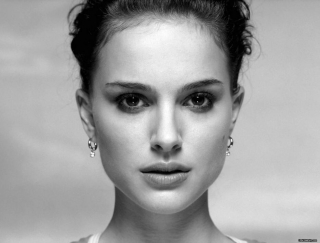

---------------------
{}
---------------------
####################################################
---------------------------------------------
Actual Image of the Person :: Unknown
---------------------------------------------


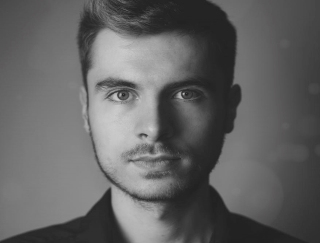

---------------------
{}
---------------------
####################################################
---------------------------------------------
Actual Image of the Person :: Unknown
---------------------------------------------


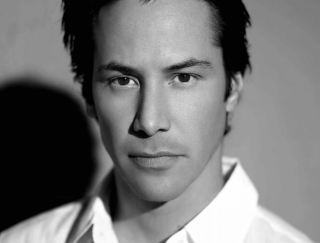

---------------------
{}
---------------------


In [24]:
for imageTest in imageUnknown:
    print('####################################################')
    personNameConfidences = {}
    print('---------------------------------------------')
    print('Actual Image of the Person :: ' + imageTest[1] )
    print('---------------------------------------------')
    imageLoaded = Image.open(imageTest[0])
    display(imageLoaded)
    stream = io.BytesIO()
    imageLoaded.save(stream,format="JPEG")
    image_binary = stream.getvalue()

    response = rekognition.search_faces_by_image(
                CollectionId=collectionName,
                Image={'Bytes':image_binary}                                       
                )
    
    for match in response['FaceMatches']:
        facePrintID = match['Face']['FaceId']
        confidence = round(match['Face']['Confidence'], 5)
        
        face = dynamodb.get_item(
            TableName=tableName,  
            Key={'RekognitionId': {'S': match['Face']['FaceId']}}
            )
        
        if 'Item' in face:
            personName = face['Item']['FullName']['S']
            if personName in personNameConfidences.keys():
                personNameConfidences[personName].append(confidence)
            else:
                personNameConfidences[personName] = [confidence]
            if firstImageTest:
                
                print ('FacePrintID: ',facePrintID,'  ::  ' ,'Confidence: ' ,confidence,'  ::  ','Identified Person: ',personName )    
                print('---')
        else:
            print ('no match found in person lookup')
    print('---------------------')        
    print(personNameConfidences)
    print('---------------------') 

# Perform Testing on Grouped Images

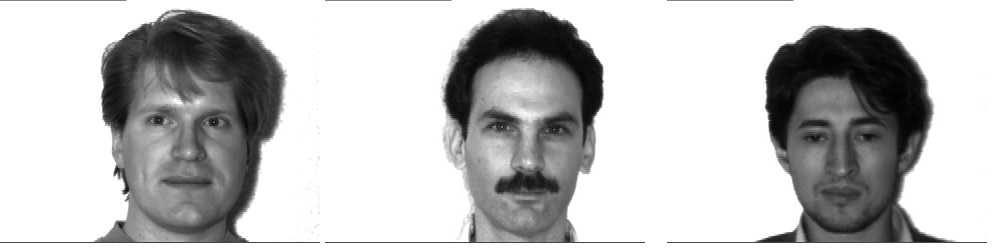

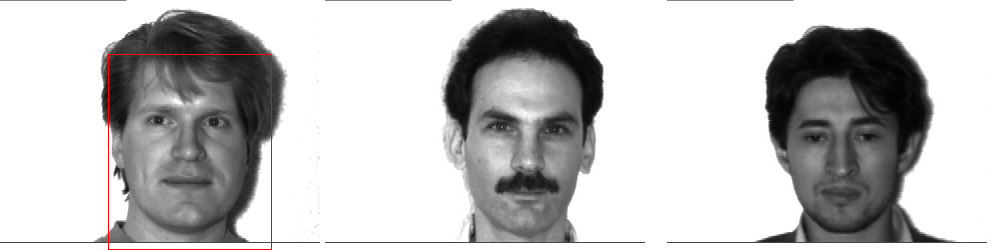

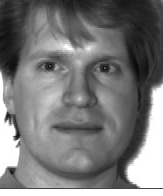

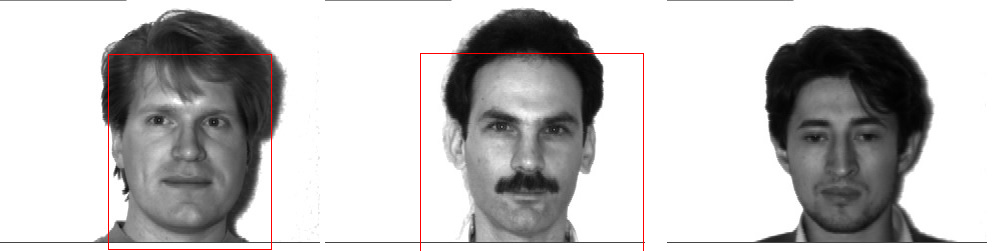

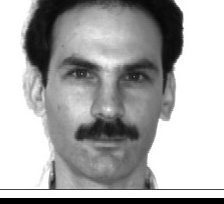

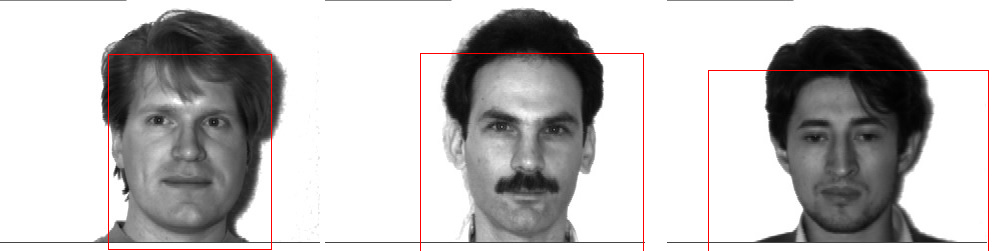

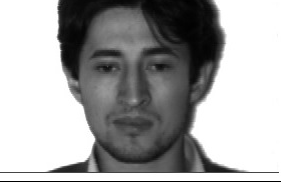

In [25]:
image = Image.open("Grouped\group1.jpg")
display(image)
stream = io.BytesIO()
image.save(stream,format="JPEG")
image_binary = stream.getvalue()

response = rekognition.detect_faces(
    Image={'Bytes':image_binary}                                        
        )
    
all_faces=response['FaceDetails']
    
# Initialize list object
boxes = []

# Get image diameters
image_width = image.size[0]
image_height = image.size[1]
   
# Crop face from image
for face in all_faces:
    box=face['BoundingBox']
    x1 = int(box['Left'] * image_width) * 0.9
    y1 = int(box['Top'] * image_height) * 0.9
    x2 = int(box['Left'] * image_width + box['Width'] * image_width) * 1.10
    y2 = int(box['Top'] * image_height + box['Height']  * image_height) * 1.10
    image_crop = image.crop((x1,y1,x2,y2))
    imgageDraw = ImageDraw.Draw(image)  
    imgageDraw.rectangle([x1,y1,x2,y2], outline ="red")
    display(image)
    display(image_crop)
    
    stream = io.BytesIO()
    image_crop.save(stream,format="JPEG")
    image_crop_binary = stream.getvalue()

    # Submit individually cropped image to Amazon Rekognition
    response = rekognition.search_faces_by_image(
            CollectionId=collectionName,
            Image={'Bytes':image_crop_binary}                                       
            )
    
    if len(response['FaceMatches']) > 0:
        # Return results
        print ('Coordinates ', box)
        for match in response['FaceMatches']:
                
            face = dynamodb.get_item(
                TableName=tableName,               
                Key={'RekognitionId': {'S': match['Face']['FaceId']}}
                )
    
            if 'Item' in face:
                person = face['Item']['FullName']['S']
            else:
                person = 'no match found'
            
            print (match['Face']['FaceId'],match['Face']['Confidence'],person)